In [4]:
from sklearn import preprocessing
import numpy as np

In [3]:
radiomics_features = np.random.rand(246, 47)
radiomics_features.shape

(246, 47)

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()

scaled_radiomics_features = min_max_scaler.fit_transform(radiomics_features)
print(scaled_radiomics_features)

[[0.7224731  0.85698362 0.82161024 ... 0.83514644 0.24366388 0.23512044]
 [0.5728121  0.45229518 0.60896312 ... 0.30756771 0.57117195 0.74525277]
 [0.46528346 0.68770947 0.08747929 ... 0.36768055 0.12153392 0.56442727]
 ...
 [0.37607571 0.20464707 0.98781674 ... 0.10251225 0.94081331 0.85687767]
 [0.54333035 0.50643834 0.89191624 ... 0.79660925 0.88526219 0.95140137]
 [0.67472337 0.46981353 0.6701224  ... 0.68490652 0.5892502  0.07344252]]


In [39]:
from scipy.stats import pearsonr

def drop_redundancy(features):
    correlation_matrix = np.zeros((47, 47))

    for i in range(0, scaled_radiomics_features.shape[1]):
        for j in range(0, scaled_radiomics_features.shape[1]):
            feature_1= scaled_radiomics_features[:, j]
            feature_2 = scaled_radiomics_features[:, i]
            corr, _ = pearsonr(feature_1, feature_2)
            correlation_matrix[i, j] = corr
    correlation = correlation_matrix.mean(axis=1)
    
    # make correlation mask to remove redundancy
    correlation_mask = (correlation > 0.9)  # boolean mask for correlated features
    
    # get indices of correlated features
    correlated_indices = np.where(correlation_mask)[0]
    
    # remove correlated features
    cleaned = np.delete(features, correlated_indices, axis=1)
    return cleaned

In [41]:
cleaned = drop_redundancy(scaled_radiomics_features)
print(cleaned.shape)

(246, 47)


In [43]:
def build_similarity_matrix(features):
    similarity_matrix = np.zeros((246, 246))

    for i in range(0, cleaned.shape[0]):
        for j in range(0, cleaned.shape[0]):
            roi_1 = cleaned[i, :]
            roi_2 = cleaned[j, :]
            corr, _ = pearsonr(roi_1, roi_2)
            similarity_matrix[i, j] = corr

    return similarity_matrix

In [44]:
r2sn = build_similarity_matrix(cleaned)

In [45]:
r2sn.shape

(246, 246)

<AxesSubplot:>

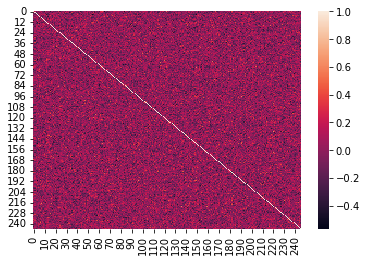

In [46]:
import seaborn as sns

sns.heatmap(r2sn)

In [47]:
def rmcs(similarity_matrix):
    return similarity_matrix.mean(axis=1)

In [48]:
print(rmcs(r2sn))

[-1.61264225e-03 -4.58011428e-03  1.12019488e-04 -1.43412686e-02
  2.39323091e-02  8.02361388e-03  8.97740507e-03 -1.15405791e-02
  1.63320614e-03  7.92964661e-03 -1.24291989e-02 -5.99201373e-03
  2.71122645e-02  2.02637007e-02  1.88159866e-02  1.28860252e-02
  4.24041699e-03 -5.36754521e-03  5.80097806e-03 -3.88709332e-04
  7.73921351e-03 -1.24447265e-02 -1.47739202e-03 -1.42872245e-03
  1.71449025e-02  2.44028850e-02  1.04658187e-02  2.03431726e-02
 -5.37671863e-03 -5.31163920e-03 -5.13184591e-03  9.31585201e-03
  9.30861784e-03  9.21205047e-03  8.51662514e-03 -1.18260889e-02
  5.93005655e-04 -6.44853486e-03  1.46513862e-02  3.42508269e-04
 -5.17411575e-03  9.87509652e-03  1.48495536e-02 -4.62435302e-03
  1.95979159e-02 -4.00917242e-03  1.90460844e-03  2.04912054e-02
 -1.30378112e-02 -4.49482351e-04 -1.19416668e-03  1.62583730e-02
  7.22796456e-03  1.74910336e-02  1.36970752e-02  4.01344722e-03
  9.50009798e-04  3.07626504e-02 -7.95550627e-03  1.86051544e-02
  5.98883626e-03  1.68006